In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib
import glob
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm, BoundaryNorm
from datetime import datetime as dt
import matplotlib as mpl
%matplotlib inline 

In [2]:
data = xr.open_dataset('air.mon.mean.nc')

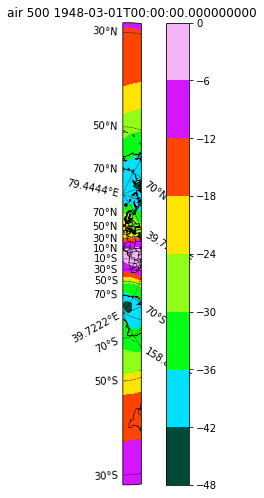

In [15]:
def create_contourf(data, variable, tps, niveau, ax):
        ds = data[variable].sel(level=niveau).sel(time=tps)

        resol = '10m'  # use data at this scale
        cmap = mpl.cm.gist_ncar

            # Add coastlines
        ax.set_extent([data["lon"][0]-180,data["lon"][-1]-180,data["lat"][0],data["lat"][-1]])
        ax.set_title(str(variable)+" "+str(niveau)+" "+str(tps))
        cs=ax.contourf(data['lon'], data['lat'], ds,
                    transform = ccrs.PlateCarree(), cmap=cmap)

        ax.coastlines(resolution=resol, color='black', linewidth=0.5)
        bodr = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale=resol, facecolor='none')
        ax.add_feature(bodr, linestyle='-', alpha=1, linewidth=0.5)
        gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--', draw_labels=True, y_inline=False)
        gl.top_labels=False
        gl.right_labels=False
        gl.xlocator= mpl.ticker.FixedLocator(np.linspace(data["lon"][0],data["lon"][-1],10))
        gl.ylocator= mpl.ticker.FixedLocator(np.linspace(data["lat"][0],data["lat"][-1],10))
        return cs

# Make the figure larger
fig = plt.figure(figsize=(11,8.5), frameon=False)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Stereographic())

cs = create_contourf(data, 'air', '1948-03-01T00:00:00.000000000',500, ax)
# Add colorbar
cbar = plt.colorbar(cs, location='right',fraction=0.046, pad=0.04)

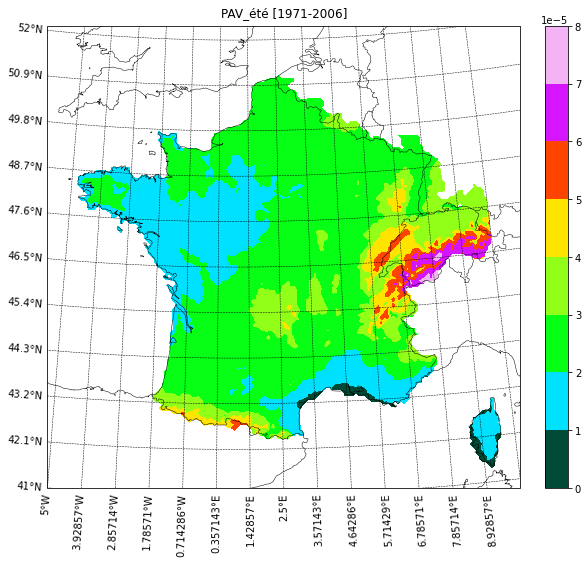

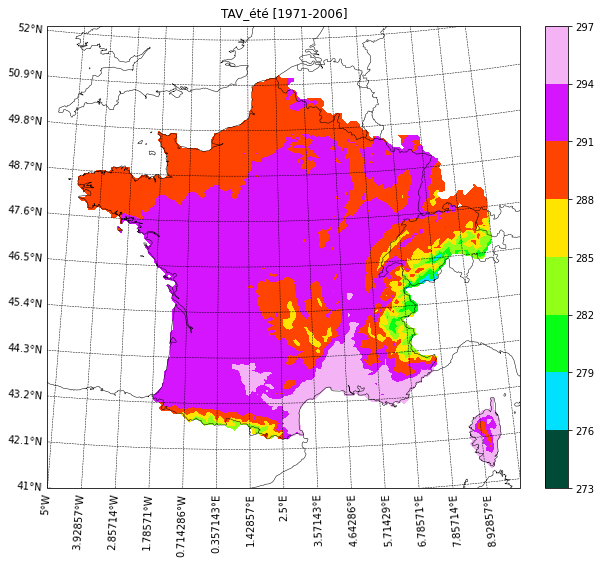

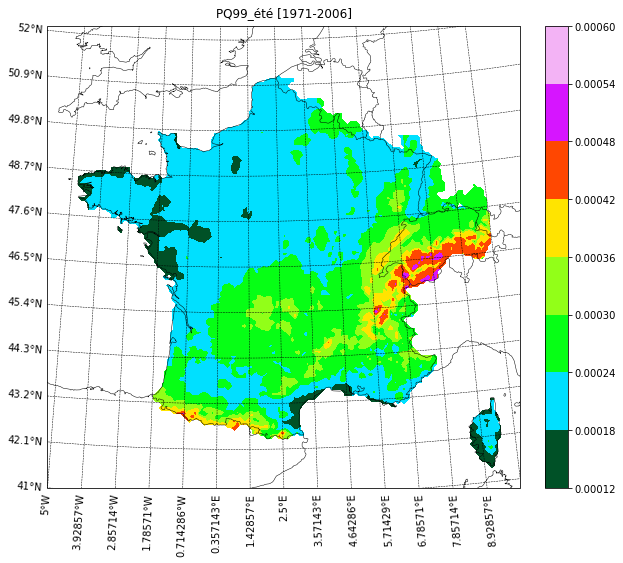

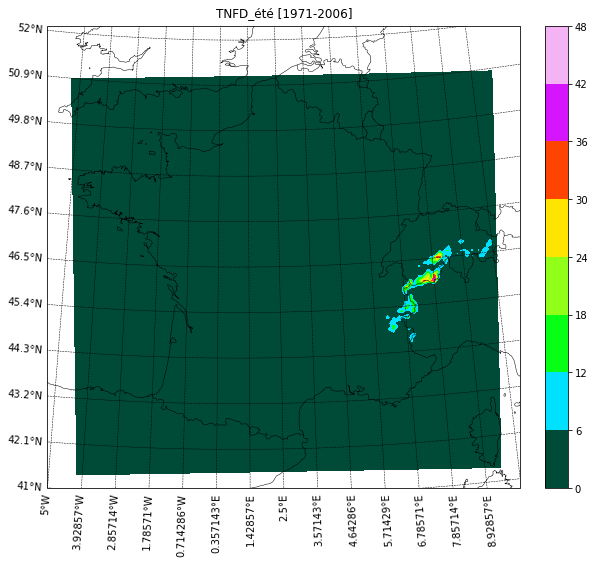

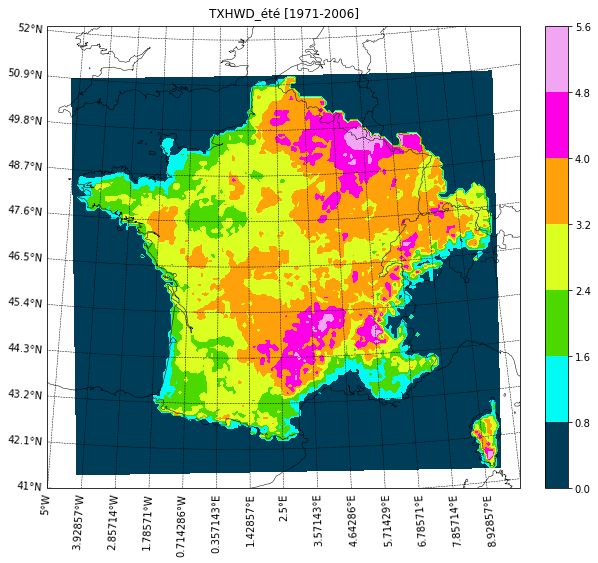

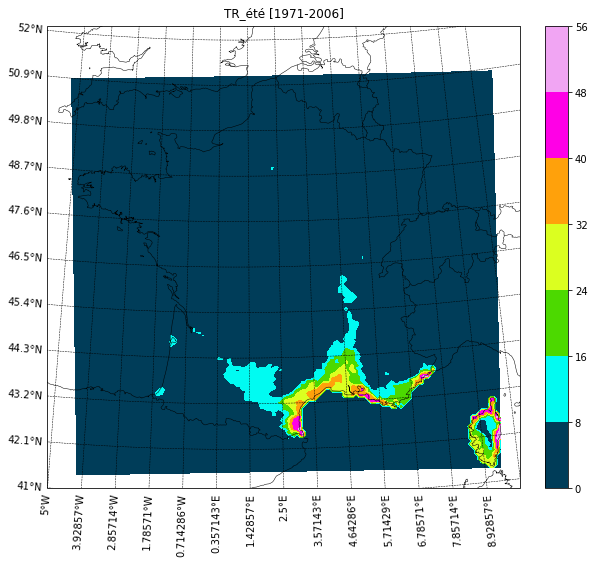

In [ ]:
param = ['PAV','TAV','PQ99','TNFD','TXHWD','TR']

for p in param :
    # Make the figure larger
    fig = plt.figure(figsize=(11,8.5), frameon=False)

    # Set the axes using the specified map projection
    ax=plt.axes(projection=ccrs.Stereographic(central_longitude=1, central_latitude=54))

    cs = create_contourf(data, p, 1, ax)
    # Add colorbar
    cbar = plt.colorbar(cs, location='right',fraction=0.046, pad=0.04)

    plt.savefig(f"figures/{p}_été.jpg", dpi=1000, bbox_inches='tight')

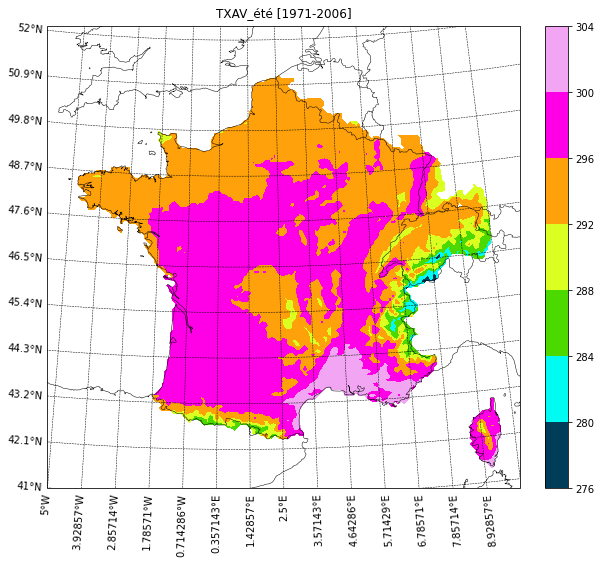

In [ ]:
def create_contourf(data, indicateur, ax):
    ds = data[indicateur]
    # Add coastlines
    resol = '10m'  # use data at this scale
    ax.set_extent([-5,10,41,52])
    ax.set_title(f"{indicateur}_été [1971-2006]")
    
    cmap = mpl.cm.gist_ncar
    
    cs=ax.contourf(data['lon'], data['lat'], ds,
               transform = ccrs.PlateCarree(), cmap=cmap)
    
    ax.coastlines(resolution=resol, color='black', linewidth=0.5)
    bodr = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale=resol, facecolor='none')
    ax.add_feature(bodr, linestyle='-', alpha=1, linewidth=0.5)
  
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--', draw_labels=True, y_inline=False)
    gl.top_labels=False
    gl.right_labels=False
    gl.xlocator= ticker.FixedLocator(np.linspace(-5,10,15))
    gl.ylocator= ticker.FixedLocator(np.linspace(41,52,11))
    
    return cs

# Make the figure larger
fig = plt.figure(figsize=(11,8.5), frameon=False)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Stereographic(central_longitude=1, central_latitude=54))

cs = create_contourf(data, 'TXAV', ax)
# Add colorbar
cbar = plt.colorbar(cs, location='right',fraction=0.046, pad=0.04)
plt.savefig(f"figures/{p}_été.jpg", dpi=1000, bbox_inches='tight')